In [1]:
import pandas as pd
import numpy as np

import cv2
import matplotlib.pyplot as plt

In [2]:
#Problem 1
def gradient_magnitude(image):
    kernel1 = np.array([
        [1, 0, -1], 
        [2, 0, -2], 
        [1, 0, -1]])
    kernel2 = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]])
    gradx = cv2.filter2D(image, -1, kernel1)
    grady = cv2.filter2D(image, -1, kernel2)
    return gradx+grady

    

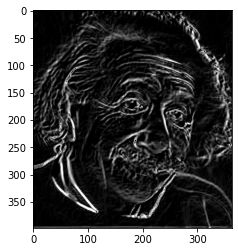

In [3]:
image = cv2.imread("Image1.png", 0)
grad = gradient_magnitude(image)
plt.imshow(grad, cmap="gray")

In [4]:
#Problem 2
def laplacian_(image):
    kernel1 = np.array([
        [0, -1, 0],
        [-1, 4,-1],
        [0, -1, 0]])
    kernel2 = np.array([
        [0, 1, 0],
        [1, -4,1],
        [0, 1, 0]])
    
    
    lap1 = cv2.filter2D(image, -1, kernel1)
    lap2 = cv2.filter2D(image, -1, kernel2)
#     return cv2.Laplacian(image, -1, (3, 3))
    return lap1
    

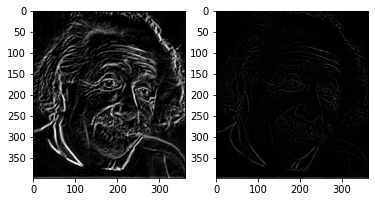

In [5]:
fig, ax = plt.subplots(1, 2)
image = cv2.imread("Image1.png", 0)
ax[0].imshow(gradient_magnitude(image), cmap="gray")
ax[1].imshow(laplacian_(image), cmap="gray")

In [6]:
#Problem 3
#Zero crossings occur when the sign changes in an image
def zero_crossing(image):
    gaus = cv2.GaussianBlur(image, (5,5), sigmaX=1.5)
    LoG = laplacian_(gaus)
    zrc = cv2.threshold(LoG,0,255,cv2.THRESH_BINARY)[1]
    return zrc

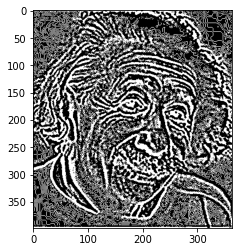

In [7]:
zrc = zero_crossing(image)
plt.imshow(zrc, cmap="gray")

In [8]:
def laplacian_edge_detection(image):
    grad = gradient_magnitude(image)
    grad = grad / 255
    zrc = zero_crossing(image)
    zrc = zrc / 255
    thresh = 0.1
    assert grad.shape == zrc.shape
    out = np.zeros(grad.shape)
    for i in range(grad.shape[0]):
        for j in range(grad.shape[1]):
            if grad[i, j] > thresh and zrc[i, j]:
                out[i, j] = 1
            
    return out


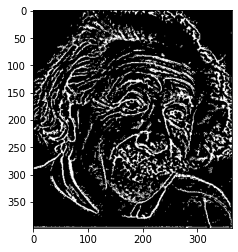

In [9]:
edge = laplacian_edge_detection(image)
plt.imshow(edge, cmap="gray")